In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [4]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [6]:
customer_data = transactions.merge(customers, on='CustomerID')

In [7]:
customer_profiles = customer_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  
    'Quantity': 'sum',    
    'ProductID': 'count', 
}).reset_index()


In [8]:
customer_profiles = customer_profiles.merge(customers[['CustomerID', 'Region', 'SignupDate']], on='CustomerID')

### Convert Region to numeric for clustering

In [9]:
customer_profiles['Region'] = customer_profiles['Region'].astype('category').cat.codes

### Extract features for clustering

In [10]:
features = customer_profiles[['TotalValue', 'Quantity', 'ProductID', 'Region']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[-0.06170143, -0.12203296, -0.01145819,  1.23740234],
       [-0.87774353, -0.44800021, -0.46749414, -1.41989693],
       [-0.40585722,  0.20393428, -0.46749414,  1.23740234],
       [ 1.03254704,  1.67078689,  1.35664965,  1.23740234],
       [-0.78392861, -0.93695108, -0.92353008, -1.41989693],
       [ 0.41587942, -0.12203296, -0.46749414,  1.23740234],
       [-0.48548229, -0.77396745, -0.92353008, -1.41989693],
       [ 0.43997044,  1.18183602,  2.26872154,  0.35163592],
       [-1.40630171, -1.58888557, -0.92353008, -0.53413051],
       [-0.9571662 , -0.12203296, -0.46749414, -0.53413051],
       [ 0.14369581,  0.04095066, -0.01145819,  1.23740234],
       [ 0.96492372,  1.0188524 ,  0.9006137 ,  1.23740234],
       [ 1.38575064,  0.85586877,  0.9006137 ,  1.23740234],
       [-1.72239508, -1.75186919, -1.83560198, -0.53413051],
       [-1.26353893, -1.42590195, -1.37956603,  0.35163592],
       [ 0.22269727, -0.44800021, -0.01145819,  0.35163592],
       [ 0.70375173,  1.

# Perform KMeans Clustering

In [11]:
num_clusters = 5 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\Rohit Gaikwad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
customer_profiles

,CustomerID,TotalValue,Quantity,ProductID,Region,SignupDate,Cluster
0,C0001,3354.52,12,5,3,2022-07-10,4
1,C0002,1862.74,10,4,0,2022-02-13,0
2,C0003,2725.38,14,4,3,2024-03-07,4
3,C0004,5354.88,23,8,3,2022-10-09,3
4,C0005,2034.24,7,3,0,2022-08-15,0
...,...,...,...,...,...,...,...
194,C0196,4982.88,12,4,1,2022-06-07,2
195,C0197,1928.65,9,3,1,2023-03-21,0
196,C0198,931.83,3,2,1,2022-02-27,0
197,C0199,1979.28,9,4,1,2022-12-03,0


In [13]:
db_index = davies_bouldin_score(scaled_features, customer_profiles['Cluster'])
db_index

0.996181881661936

## Visualize Clusters using a scatter plot (first two features for simplicity)

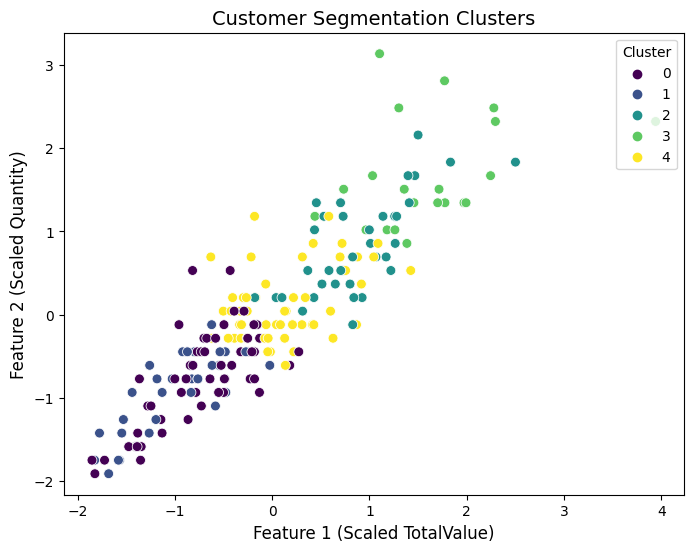

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=customer_profiles['Cluster'],
    palette='viridis',
    s=50
)
plt.title("Customer Segmentation Clusters", fontsize=14)
plt.xlabel("Feature 1 (Scaled TotalValue)", fontsize=12)
plt.ylabel("Feature 2 (Scaled Quantity)", fontsize=12)
plt.legend(title="Cluster", loc="upper right")
plt.show()